**2023-01-17 `06-Python-APIs - Day 3 - APIs and Geospatial Data visualization`**

**Objectives**
* Use the Geoapifi API to obtain information about geographic areas.
* Use the Census API wrapper.
* Explain the concept of rate limits and the importance of creating test cases before running large scripts.
* Dissect new API documentation.
* Visually represent data on a map with the GeoViews Python library.

**Presentation**
* [06-Python-APIs - Day 3 - APIs and Geospatial Data visualization](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/UCB-VIRT-DATA-PT-11-2022-U-LOLC/-/blob/main/slides/Data-06.3_Bank_Deserts_v2.0.pdf)

**Install**
```
conda update -n base -c defaults conda -y
pip install gmaps
pip install us
conda install -c conda-forge gmaps -y
pip install census
jupyter nbextension enable --py gmaps
pip install hvplot
pip install Proj
pip install GeoViews
pip install pyproj
pip install cartopy

conda install -c pyviz hvplot geoviews
```

**Google API key**
* Visit  https://cloud.google.com/maps-platform/ and click Get Started
* Select Boxes for `Maps` and `Places`.
* Click Create a New Project and give a name.
* Click Create Billing Account

    * Google charges for services but a $200 credit is provided for the these services.

>NOTE charges above $200 will be charged to your personal account. Nothing in this class will go over that credit. Alerts can be setup under the billing menu.
  
* Add your API KEY to your `config.py` file using:

```python
google_api_key = "TYPE_YOUR_API_KEY_HERE"
```
* Consult the Capping_Queries.md to set query limits for API usage

**Census API**
* Obtains an API key from http://www.census.gov/developers/ and add your API KEY to your `config.py` file using:

```python
census_api_key = "TYPE_YOUR_API_KEY_HERE"
```

**Geoapify**
* Register an account on [Geoapify MyProjects](https://myprojects.geoapify.com/) and verify your email by following the link we've sent you. and add your API KEY to your `config.py` file using:

```python
geoapify_key = "TYPE_YOUR_API_KEY_HERE"
```

**Resources**
* [Build awesome apps with Google’s knowledge of the real world](https://developers.google.com/maps/)
* [Google Places](https://developers.google.com/places/)
* [Maps Platform](https://cloud.google.com/maps-platform/)

In [1]:
# !conda update -n base -c defaults conda -y
# !pip install gmaps
# !pip install us
# # !conda install -c conda-forge gmaps -y
# !pip install census
# !jupyter nbextension enable --py gmaps

# ==========================================

### 3.01 Instructor Do: Geoapify Geocode (0:15)

In [67]:
# Dependencies
import requests
import json

# Import the API key
# from config import geoapify_key

In [68]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
geoapify_key = os.getenv("geoapify_key")
type(geoapify_key)

str

In [69]:
# Target city
target_city = "Sydney, Australia"

# Build the endpoint URL
target_url = f"https://api.geoapify.com/v1/geocode/search?text={target_city}&format=json&apiKey={geoapify_key}"

In [70]:
# Run a request to endpoint and convert result to json
geo_data = requests.get(target_url).json()

# Print the json
print(geo_data)

{'results': [{'datasource': {'sourcename': 'openstreetmap', 'attribution': '© OpenStreetMap contributors', 'license': 'Open Database License', 'url': 'https://www.openstreetmap.org/copyright'}, 'country': 'Australia', 'country_code': 'au', 'state': 'New South Wales', 'city': 'Sydney', 'municipality': 'Council of the City of Sydney', 'lon': 151.2082848, 'lat': -33.8698439, 'state_code': 'NSW', 'formatted': 'Sydney, NSW, Australia', 'address_line1': 'Sydney', 'address_line2': 'NSW, Australia', 'category': 'administrative', 'timezone': {'name': 'Australia/Sydney', 'offset_STD': '+10:00', 'offset_STD_seconds': 36000, 'offset_DST': '+11:00', 'offset_DST_seconds': 39600, 'abbreviation_STD': 'AEST', 'abbreviation_DST': 'AEDT'}, 'result_type': 'city', 'rank': {'importance': 0.8345908962989684, 'popularity': 7.332617625087506, 'confidence': 1, 'confidence_city_level': 1, 'match_type': 'full_match'}, 'place_id': '512088e244aae662405903907f0b57ef40c0f00101f901f5bc570000000000c00208', 'bbox': {'lo

In [86]:
all_res = []
for x in geo_data["results"]:
    all_res.append({
        "City": x["city"],
        "Country": x["country"],
        "Lat": x["lat"],
        "Lon": x["lon"]
    }
    )
    # print(x["city"],x["country"], x["lat"], x["lon"], )
pd.DataFrame(all_res)

,City,Country,Lat,Lon
0,Sydney,Australia,-33.869844,151.208285
1,Sydney,Australia,-33.867926,151.210138
2,Sydney,Australia,-33.949894,151.181968
3,Sydney,Australia,-33.878494,151.204073
4,Sydney,Australia,-33.871457,151.214388


In [75]:
# Print the json (pretty printed)
print(json.dumps(geo_data, indent=4, sort_keys=True))

{
    "query": {
        "parsed": {
            "city": "sydney",
            "country": "australia",
            "expected_type": "city"
        },
        "text": "Sydney, Australia"
    },
    "results": [
        {
            "address_line1": "Sydney",
            "address_line2": "NSW, Australia",
            "bbox": {
                "lat1": -34.1732416,
                "lat2": -33.3641864,
                "lon1": 150.260825,
                "lon2": 151.343898
            },
            "category": "administrative",
            "city": "Sydney",
            "country": "Australia",
            "country_code": "au",
            "datasource": {
                "attribution": "\u00a9 OpenStreetMap contributors",
                "license": "Open Database License",
                "sourcename": "openstreetmap",
                "url": "https://www.openstreetmap.org/copyright"
            },
            "formatted": "Sydney, NSW, Australia",
            "lat": -33.8698439,
            

In [83]:
# Extract latitude and longitude
lat = geo_data["results"][0]["lat"]
lon = geo_data["results"][0]["lon"]

# Print the latitude and longitude
print('''
    City: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_city, lat, lon))


    City: Sydney, Australia
    Latitude: -33.8698439
    Longitude: 151.2082848
    


# ==========================================

### 3.02 Instructor Do: Geoapify Places (0:15)

In [87]:
# Dependencies
import requests
import json

# Import the API key
# from config import geoapify_key

In [89]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
geoapify_key = os.getenv("geoapify_key")
type(geoapify_key)

str

In [ ]:
url = "https://api.geoapify.com/v2/places"
q = {
    "categories": "catering.restaurant",
    "conditions": "vegetarian",
    "radius": 8000,
}

In [90]:
# Set the geographical coordinates for Sydney, Australia
latitude = -33.8698439
longitude = 151.2082848

# Set the parameters for the type of place
categories = "catering.restaurant"
conditions = "vegetarian"
radius = 8000

# Set the parameters for the type of search
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"
limit = 20

# set up a parameters dictionary
params = {
    "categories":categories,
    "conditions":conditions,
    "limit":limit,
    "filter":filters,
    "bias":bias,
    "apiKey":geoapify_key    
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

In [91]:
# print the response url, avoid doing for public github repos in order to avoid exposing key
print(response.url)

https://api.geoapify.com/v2/places?categories=catering.restaurant&conditions=vegetarian&limit=20&filter=circle%3A151.2082848%2C-33.8698439%2C8000&bias=proximity%3A151.2082848%2C-33.8698439&apiKey=fad7831d24c64b9abe8fd6463b6fa086


In [92]:
# convert response to json
places_data = response.json()

# Print the json (pretty printed)
print(json.dumps(places_data, indent=4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    151.2080336,
                    -33.87648089966814
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Macchiato",
                "address_line2": "338 Pitt Street, Sydney NSW 2000, Australia",
                "categories": [
                    "catering",
                    "catering.restaurant",
                    "catering.restaurant.pizza",
                    "vegetarian",
                    "wheelchair",
                    "wheelchair.limited"
                ],
                "city": "Sydney",
                "country": "Australia",
                "country_code": "au",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database Licence",
                    "raw": {
                        "amenity":

In [93]:
# Print the name and address of the first restaurant that appears
print(places_data["features"][0]["properties"]["name"])
print(places_data["features"][0]["properties"]["address_line2"])

Macchiato
338 Pitt Street, Sydney NSW 2000, Australia


In [97]:
for x in places_data["features"]:
    print(x["properties"]["name"], "-----", x["properties"]["address_line1"], "-----", x["properties"]["address_line2"])

Macchiato ----- Macchiato ----- 338 Pitt Street, Sydney NSW 2000, Australia
Sushi Rio ----- Sushi Rio ----- Liverpool Street, Sydney NSW 2000, Australia
Hakatamon Ramen ----- Hakatamon Ramen ----- Nicolle Walk, Haymarket NSW 2000, Australia
Yuzu ----- Yuzu ----- 1 Scott Street, Pyrmont NSW 2009, Australia
Dumpling & Noodle House ----- Dumpling & Noodle House ----- 430 Wattle Street, Ultimo NSW 2007, Australia
Nour ----- Nour ----- 490 Crown Street, Surry Hills NSW 2010, Australia
ANCHOR Cafe & Restaurant ----- ANCHOR Cafe & Restaurant ----- 118 Alfred Street South, Milsons Point NSW 2061, Australia
Calle Rey ----- Calle Rey ----- 62-64 King Street, Newtown NSW 2042, Australia
Montezuma's ----- Montezuma's ----- 51 Alexander Street, Crows Nest NSW 2065, Australia
Pizza Madre ----- Pizza Madre ----- Sydenham Road, Marrickville NSW 2204, Australia
Cali Press ----- Cali Press ----- 2/16 Hall Street, Bondi Beach NSW 2026, Australia
Bar Roma ----- Bar Roma ----- Shiers Avenue, Mascot NSW 202

# ==========================================

### 3.03 Students Do: Geoapify Drills (0:20)

# Geoapify Drills

In this activity, you will perform API calls to the Geoapify places and geocoding endpoints.

## Instructions

* Complete each of the six drills articulated in the code provided in [geoapify_drills.ipynb](Unsolved/geoapify_drills.ipynb). Feel encouraged to look back at the previous examples, but know that you will have to consult the Geoapify API documentation.

### Hints

* See the [Geoapify Geocoding Documentation](https://apidocs.geoapify.com/docs/geocoding/forward-geocoding/#about).

* See the [Geoapify Places Documentation](https://apidocs.geoapify.com/docs/places/#about).

---

# Geoapify Drills

Create code to answer each of the following questions.

> **Hint:** You will need multiple target URLs and multiple API requests.

In [98]:
# Dependencies
import requests
import json

# Import the API key
# from config import geoapify_key
# geoapify_key = ""

In [99]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
geoapify_key = os.getenv("geoapify_key")
type(geoapify_key)

str

## 1. What are the geocoordinates (latitude and longitude) of Brisbane, Australia?

In [100]:
# Set the search parameters
target_city = "Brisbane, Australia"

params = {
    "text": target_city,
    "apiKey": geoapify_key
}

# Build URL using the geocode endpoint
base_url = "https://api.geoapify.com/v1/geocode/search"

In [101]:
# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "bbox": [
                152.679693,
                -27.660219,
                153.468275,
                -27.022014
            ],
            "geometry": {
                "coordinates": [
                    153.0234991,
                    -27.4689682
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Brisbane City",
                "address_line2": "QLD, Australia",
                "category": "administrative",
                "city": "Brisbane City",
                "country": "Australia",
                "country_code": "au",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database License",
                    "sourcename": "openstreetmap",
                    "url": "https://www.openstreetmap.org/copyright"
                },
                "distance": 0,
        

In [102]:
# Extract lat/lon
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]

# Print results
print(f"{target_city}: {lat}, {lon}")

Brisbane, Australia: -27.4689682, 153.0234991


## 2. What are the geocoordinates (latitude and longitude) of The Sydney Opera House?

In [103]:
# update params dict
target_city = "Sydney Opera House"

params = {
    "text": target_city,
    "apiKey": geoapify_key
}

# Build URL using the geocode endpoint
base_url = "https://api.geoapify.com/v1/geocode/search"

In [104]:
# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "bbox": [
                151.214428,
                -33.8579307,
                151.2158894,
                -33.856305
            ],
            "geometry": {
                "coordinates": [
                    151.21512338473752,
                    -33.85719805
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Sydney Opera House",
                "address_line2": "2 Macquarie Street, Sydney NSW 2000, Australia",
                "category": "entertainment.culture.arts_centre",
                "city": "Sydney",
                "country": "Australia",
                "country_code": "au",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database License",
                    "sourcename": "openstreetmap",
                    "url": "https://www.openstreetmap.org/copyright"

In [105]:
# Extract lat/lon
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]

# Print results
print(f"{target_city}: {lat}, {lon}")

Sydney Opera House: -33.85719805, 151.21512338473752


## 3. Find the name and address of a pharmacy in Brisbane, Australia.

> **Hint:** Review <https://apidocs.geoapify.com/docs/places/#categories>.

In [106]:
# Set the geographical coordinates for Brisbane, Australia
latitude = -27.4705
longitude = 153.0260

# Set the parameters for the type of place
categories = "healthcare.pharmacy"

# Set the parameters for the type of search
bias = f"proximity:{longitude},{latitude}"
limit = 20

# set up a parameters dictionary
params = {
    "categories":categories,
    "limit":limit,
    "bias":bias,
    "apiKey":geoapify_key    
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

In [107]:
# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    153.02486289999996,
                    -27.469754799462155
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Priceline Pharmacy",
                "address_line2": "120 Queen Street, Brisbane City QLD 4001, Australia",
                "categories": [
                    "commercial.health_and_beauty",
                    "commercial.health_and_beauty.pharmacy",
                    "healthcare",
                    "healthcare.pharmacy"
                ],
                "city_district": "Brisbane City",
                "country": "Australia",
                "country_code": "au",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database Licence",
                    "raw": {
                        "amenity": "p

In [108]:
# Print the results
print(response["features"][0]["properties"]["name"])
print(response["features"][0]["properties"]["address_line2"])

Priceline Pharmacy
120 Queen Street, Brisbane City QLD 4001, Australia


## 4. Find a pet shop within a 5km radius from the Sydney Opera House.

In [109]:
# Set the geographical coordinates for the Sydney Opera House
latitude = -33.85729805
longitude = 151.21512338473752

# Set the parameters for the type of place
categories = "commercial.pet"
radius = 5000

# Set the parameters for the type of search
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"
limit = 20

# set up a parameters dictionary
params = {
    "categories":categories,
    "limit":limit,
    "filter":filters,
    "bias":bias,
    "apiKey":geoapify_key    
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

In [110]:
# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    151.24449289999998,
                    -33.87744329966832
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Petbarn",
                "address_line2": "Kiaora Road, Double Bay NSW 2028, Australia",
                "categories": [
                    "commercial",
                    "commercial.pet",
                    "pet",
                    "pet.shop"
                ],
                "city": "Sydney",
                "country": "Australia",
                "country_code": "au",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database Licence",
                    "raw": {
                        "name": "Petbarn",
                        "osm_id": 4925657661,
                        "osm_type": "n",
  

In [111]:
# Print the results
print(response["features"][0]["properties"]["name"])
print(response["features"][0]["properties"]["address_line2"])

Petbarn
Kiaora Road, Double Bay NSW 2028, Australia


## 5. Find the nearest dentist to your house.

> **Hint:** Use Geoapify Geocode to find your latitude and Geoapify Places to find the dentist.

In [112]:
# Geoapify Geocode to find latitude and longitude
my_address = "1309 Hay St, West Perth WA 6005, Australia"

params = {
    "text": my_address,
    "apiKey": geoapify_key
}

# Build URL using the geocode endpoint
base_url = "https://api.geoapify.com/v1/geocode/search"

In [113]:
# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "bbox": [
                115.8386495,
                -31.9478073,
                115.8388058,
                -31.9476898
            ],
            "geometry": {
                "coordinates": [
                    115.8387213036199,
                    -31.9477365
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "1309 Hay Street",
                "address_line2": "West Perth WA 6005, Australia",
                "category": "building",
                "city": "Perth",
                "country": "Australia",
                "country_code": "au",
                "county": "City of Perth",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database License",
                    "sourcename": "openstreetmap",
                    "url": "https://www.openstreetmap.org/copyright"
  

In [114]:
# Extract lat/lon
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]

# Print results
print(f"{my_address}: {lat}, {lon}")

1309 Hay St, West Perth WA 6005, Australia: -31.9477365, 115.8387213036199


In [115]:
# Set the geographical coordinates for my home
latitude = -31.9477365
longitude = 115.8387213036199

# Set the parameters for the type of place
categories = "healthcare.dentist"

# Set the parameters for the type of search
bias = f"proximity:{longitude},{latitude}"
limit = 20

# set up a parameters dictionary
params = {
    "categories":categories,
    "limit":limit,
    "bias":bias,
    "apiKey":geoapify_key    
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

In [116]:
# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    115.84124396871061,
                    -31.950149951843606
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "West Perth Dental Centre",
                "address_line2": "39 Colin Street, West Perth WA 6005, Australia",
                "categories": [
                    "building",
                    "building.healthcare",
                    "healthcare",
                    "healthcare.dentist"
                ],
                "city": "Perth",
                "country": "Australia",
                "country_code": "au",
                "county": "City of Perth",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database Licence",
                    "raw": {
                        "addr:city": "West Perth"

In [117]:
# Print the results
print(response["features"][0]["properties"]["name"])
print(response["features"][0]["properties"]["address_line2"])

West Perth Dental Centre
39 Colin Street, West Perth WA 6005, Australia


## 6. Bonus: Find the names and addresses of the five nearest restaurants with internet access in your home city area.

> **Hint:** Read about the `proximity` bias to order the results from the nearest to the farest place. Also, read about the `conditions` to identify places that provide internet access.

In [118]:
# Set the geographical coordinates for my home
latitude = -31.9477365
longitude = 115.8387213036199

# Set the parameters for the type of place
categories = "catering.restaurant"
conditions = "internet_access"

# Set the parameters for the type of search
bias = f"proximity:{longitude},{latitude}"
limit = 20

# set up a parameters dictionary
params = {
    "categories":categories,
    "conditions":conditions,
    "limit":limit,
    "bias":bias,
    "apiKey":geoapify_key    
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

In [119]:
# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    115.85034679999997,
                    -31.951272899405485
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Cespresso CBD West",
                "address_line2": "996 Hay Street, Perth WA 6000, Australia",
                "categories": [
                    "catering",
                    "catering.restaurant",
                    "internet_access"
                ],
                "city": "Perth",
                "country": "Australia",
                "country_code": "au",
                "county": "City of Perth",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database Licence",
                    "raw": {
                        "addr:country": "AU",
                        "addr:housenumber": 996,
   

In [120]:
# Print the results
counter = 0

for place in response["features"]:
    print(f"Restaurant {counter+1}:")
    print(place["properties"]["name"])
    print(place["properties"]["address_line2"])
    print("*"*20)
    counter = counter + 1
    if counter == 5:
        break

Restaurant 1:
Cespresso CBD West
996 Hay Street, Perth WA 6000, Australia
********************
Restaurant 2:
El Peruvian Food Co.
Outridge Crescent, Subiaco WA 6008, Australia
********************
Restaurant 3:
PappaRich
101 James Street, Northbridge WA 6000, Australia
********************
Restaurant 4:
Le Vietnam
80 Barrack Street, Perth WA 6000, Australia
********************
Restaurant 5:
Burgermeister
170B Hampden Road, Nedlands WA 6009, Australia
********************


# ==========================================

### 3.04 Instructor Do: Exploring Nearest Restaurants in Madrid (0:15)

In [121]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json

# Import the API key
# from config import geoapify_key

In [122]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
geoapify_key = os.getenv("geoapify_key")
type(geoapify_key)

str

In [125]:
# Load the restaurant ethnicities into a DataFrame
types_df = pd.read_csv("04-Ins_Nearest-Restaurants/Resources/ethnicities.csv")

# Display sample data
types_df.head()

,ethnicity
0,italian
1,chinese
2,mexican
3,japanese
4,american


In [127]:
# Set up additional columns to hold information
types_df["name"] = ""
types_df["address"] = ""
types_df["distance"] = ""

# Display sample data
types_df.head()

,ethnicity,name,address,distance
0,italian,,,
1,chinese,,,
2,mexican,,,
3,japanese,,,
4,american,,,


Find the closest restaurant of each type to the Plaza Mayor in Madrid, Spain

* Latitude: 40.415392

* Longitude: -3.7073743182788528

In [128]:
# Set the geographical coordinates
latitude = 40.415392
longitude = -3.7073743182788528

# Set the parameters for the type of search
limit = 20
radius = 1000
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"

# set up a parameters dictionary
params = {
    "filter":filters,
    "limit":limit,
    "bias":bias,
    "apiKey":geoapify_key    
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

In [ ]:
# for index, row in df.iterrows()
# loc[index, "name"] = 

In [129]:
# Print a message to follow up the restaurant search
print("Starting restaurant search")

# Iterate through the types_df DataFrame
for index, row in types_df.iterrows():
    
    # Get the ethnicity type from the current DataFrame's row
    # ethnicity = types_df.loc[index, "ethnicity"]
    ethnicity = row["ethnicity"]
    
    # Add the current ethnicity type to the parameters
    params["categories"] = f"catering.restaurant.{ethnicity}"
   
    # Make an API request using the params dictionary
    restaurant = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    restaurant = restaurant.json()
    
    # Grab the first restaurant from the results and store the details in the DataFrame
    try:
        types_df.loc[index, "name"] = restaurant["features"][0]["properties"]["name"]
        types_df.loc[index, "address"] = restaurant["features"][0]["properties"]["address_line2"]
        types_df.loc[index, "distance"] = int(restaurant["features"][0]["properties"]["distance"])
    except (KeyError, IndexError):
        # If no restaurant is found, set the restaurant name as "No restaurant found".
        types_df.loc[index, "name"] = "No restaurant found"
        # Set the distance column value to np.nan to allow sorting values
        types_df.loc[index, "distance"] = np.nan
        
    # Log the search results
    print(f"nearest {types_df.loc[index, 'ethnicity']} restaurant: {types_df.loc[index, 'name']}")

# Display sample data
types_df

Starting restaurant search
nearest italian restaurant: La Fojetta
nearest chinese restaurant: Tapas de Sichuan
nearest mexican restaurant: Takos al Pastor
nearest japanese restaurant: Sushi Bar
nearest american restaurant: Hard Rock Cafe
nearest indian restaurant: Agra Palace
nearest asian restaurant: Yatai Market
nearest french restaurant: La Esquina del Real
nearest german restaurant: No restaurant found
nearest thai restaurant: Patong Thai
nearest greek restaurant: Delfos
nearest tex-mex restaurant: No restaurant found
nearest vietnamese restaurant: Viet Nam
nearest turkish restaurant: Bósforos
nearest korean restaurant: Gayagum
nearest spanish restaurant: La Campana
nearest lebanese restaurant: Byblos
nearest indonesian restaurant: No restaurant found
nearest portuguese restaurant: No restaurant found
nearest arab restaurant: Be Beirut
nearest russian restaurant: Rasputín
nearest filipino restaurant: No restaurant found
nearest african restaurant: Dakar
nearest malaysian restaurant

,ethnicity,name,address,distance
0,italian,La Fojetta,"Calle de la Escalerilla de Piedra, 2, 28005 Ma...",76
1,chinese,Tapas de Sichuan,"Cava de San Miguel, 3, 28005 Madrid, Spain",109
2,mexican,Takos al Pastor,"Calle Botoneras, 7, 28012 Madrid, Spain",86
3,japanese,Sushi Bar,"Plaza del Comandante Las Morenas, 5, 28013 Mad...",141
4,american,Hard Rock Cafe,"Calle Preciados, 11, 28013 Madrid, Spain",390
5,indian,Agra Palace,"Calle de Vergara, 7, 28013 Madrid, Spain",377
6,asian,Yatai Market,"Calle de Doctor Cortezo, 10, 28012 Madrid, Spain",396
7,french,La Esquina del Real,"Calle de la Amnistía, 4, 28013 Madrid, Spain",333
8,german,No restaurant found,,NaN
9,thai,Patong Thai,"Calle de la Cruz, 7, 28012 Madrid, Spain",543


In [130]:
# Sort restuls by distance
types_df = types_df.sort_values(by=["distance"])

# Display the top 10 nearest restaurants
types_df.head(10)

,ethnicity,name,address,distance
0,italian,La Fojetta,"Calle de la Escalerilla de Piedra, 2, 28005 Ma...",76
15,spanish,La Campana,"Calle Botoneras, 6, 28012 Madrid, Spain",76
2,mexican,Takos al Pastor,"Calle Botoneras, 7, 28012 Madrid, Spain",86
1,chinese,Tapas de Sichuan,"Cava de San Miguel, 3, 28005 Madrid, Spain",109
3,japanese,Sushi Bar,"Plaza del Comandante Las Morenas, 5, 28013 Mad...",141
14,korean,Gayagum,"Calle de Bordadores, 7, 28013 Madrid, Spain",157
32,moroccan,Marrakech,"Calle de las Hileras, 12, 28013 Madrid, Spain",229
25,peruvian,Kechua,"Calle de las Fuentes, 9, 28013 Madrid, Spain",236
52,belgian,Rincón Bruxelles,"Calle del Espejo, 28013 Madrid, Spain",252
33,ethiopian,Gonder,"Calle Grafal, 8, 28005 Madrid, Spain",255


# ==========================================

### 3.05 Partners Do: Exploring Airports in Australia (0:15)

# Exploring Airports in Australia

In this activity, you'll be tasked with obtaining information about some Australian airports. You'll be given a list of cities, and you'll need to use the Geoapify Geocoding API and Geoapify Places API to obtain the airports' information.

## Instructions

* Using [airports.ipynb](Unsolved/airports.ipynb) as a starting point, use the Geoapify Geocoding API, the Geoapify Places API, and Python to create a script that retrieves information of some Australian airports in each of the cities found in [Cities.csv](Resources/Cities.csv).

* You should create a DataFrame that has to contain each of the following columns:

  * `Lat`

  * `Lon`

  * `Airport Name`

  * `IATA Name`

  * `Airport Address`

  * `Distance`

  * `Website`

* You should review the Geoapify API documentation to identify where is this information located in the JSON response.

  * [Geocoding API docs](https://apidocs.geoapify.com/docs/geocoding/forward-geocoding/#about)

  * [Places API docs](https://apidocs.geoapify.com/docs/places/#about)

* Finally, save the airports's informations DataFrame as a CSV file called `Airport_Output.csv`.

### Hints

* You will need to obtain the latitude and longitude of each airport before sending it through the Geoapify Places API to obtain the rating.

* When using the Geoapify Places API, be sure to use the "airport" category.

* Use `try-except` to identify airports for which there are missing data.

---

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json

# Import API key
# from config import geoapify_key

In [2]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
geoapify_key = os.getenv("geoapify_key")
type(geoapify_key)

str

In [3]:
# Import cities file as DataFrame
cities_pd = pd.read_csv("05-Stu_Exploring_Airports/Resources/cities.csv")
cities_pd.head()

,City
0,Sydney
1,Melbourne
2,Perth
3,Cairns
4,Adelaide


In [5]:
for index, row in cities_pd.iterrows():
    city = row["City"]+", Australia"
    print(city)

Sydney, Australia
Melbourne, Australia
Perth, Australia
Cairns, Australia
Adelaide, Australia
Gold Coast, Australia
Townsville, Australia
Williamtown, Australia


In [6]:
# Add columns the airports data we will fetch using the Geoapify API
# Note that we used "" to specify initial entry.
cities_pd["Lat"] = ""
cities_pd["Lon"] = ""
cities_pd["Airport Name"] = ""
cities_pd["IATA Name"] = ""
cities_pd["Airport Address"] = ""
cities_pd["Distance"] = ""
cities_pd["Website"] = ""
cities_pd.head()

,City,Lat,Lon,Airport Name,IATA Name,Airport Address,Distance,Website
0,Sydney,,,,,,,
1,Melbourne,,,,,,,
2,Perth,,,,,,,
3,Cairns,,,,,,,
4,Adelaide,,,,,,,


## Look for Geographical Coordinates for Each City

In [7]:
# Define the API parameters
params = {
    "apiKey":geoapify_key,
    "format":"json"
}

# Set the base URL
base_url = "https://api.geoapify.com/v1/geocode/search"

In [8]:
# Print a message to follow up the airport search
print("Starting airport search")

# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in cities_pd.iterrows():

    # Get the city's name & add ", Australia" to the string so geoapify finds the correct city
    city = row["City"] + ", Australia"

    # Add the current city to the parameters
    params["text"] = f"{city}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert reponse to JSON
    response = response.json()

    # Extract latitude and longitude
    cities_pd.loc[index, "Lat"] = response["results"][0]["lat"]
    cities_pd.loc[index, "Lon"] = response["results"][0]["lon"]
    
    # Log the search results
    print(f"Coordinates for {city} fetched...")

# Display sample data to confirm that the coordinates appear
cities_pd.head()

Starting airport search
Coordinates for Sydney, Australia fetched...
Coordinates for Melbourne, Australia fetched...
Coordinates for Perth, Australia fetched...
Coordinates for Cairns, Australia fetched...
Coordinates for Adelaide, Australia fetched...
Coordinates for Gold Coast, Australia fetched...
Coordinates for Townsville, Australia fetched...
Coordinates for Williamtown, Australia fetched...


,City,Lat,Lon,Airport Name,IATA Name,Airport Address,Distance,Website
0,Sydney,-33.869844,151.208285,,,,,
1,Melbourne,-37.814218,144.963161,,,,,
2,Perth,-31.955896,115.86058,,,,,
3,Cairns,-16.920666,145.772185,,,,,
4,Adelaide,-34.928181,138.599931,,,,,


## Retrieve Airports' Information

In [9]:
# Set parameters to search for airport's details
radius = 50000
params = {
    "categories":"airport",
    "apiKey": geoapify_key,
    "limit":20
}

# Print a message to follow up the airport search
print("Starting airport details search")
# Set base URL
base_url = "https://api.geoapify.com/v2/places"
# Iterate through the types_df DataFrame
for index, row in cities_pd.iterrows():
    
    # Get the city's name
    city = row["City"]
    
    # Get latitude, longitude from the DataFrame
    latitude = row["Lat"]
    longitude = row["Lon"]
    
    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"
    

           
    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)
        
    # Convert the API response to JSON format
    response = response.json()
    
    # Grab the first airport from the results and store the details in the DataFrame
    try:
        cities_pd.loc[index, "Airport Name"] = response["features"][0]["properties"]["name"]
        cities_pd.loc[index, "IATA Name"] = response["features"][0]["properties"]["datasource"]["raw"]["iata"]
        cities_pd.loc[index, "Airport Address"] = response["features"][0]["properties"]["address_line2"]
        cities_pd.loc[index, "Distance"] = response["features"][0]["properties"]["distance"]
        cities_pd.loc[index, "Website"] = response["features"][0]["properties"]["datasource"]["raw"]["website"]
    except KeyError as e:
        # If no airport is found, log the error.
        print(f"{e.args[0]} not found for {cities_pd.loc[index, 'Airport Name']}")
        
    # Log the search results
    print(f"nearest airport from {city}: {cities_pd.loc[index, 'Airport Name']}")

# Display sample data
cities_pd

Starting airport details search
nearest airport from Sydney: Sydney (Kingsford Smith) Airport
nearest airport from Melbourne: Essendon Fields Airport
nearest airport from Perth: Perth Airport
website not found for Cairns Airport
nearest airport from Cairns: Cairns Airport
nearest airport from Adelaide: Adelaide Airport
nearest airport from Gold Coast: Gold Coast Airport
nearest airport from Townsville: Townsville Airport
nearest airport from Williamtown: Newcastle Airport


,City,Lat,Lon,Airport Name,IATA Name,Airport Address,Distance,Website
0,Sydney,-33.869844,151.208285,Sydney (Kingsford Smith) Airport,SYD,"McFall Street, Botany NSW 2019, Australia",6742,https://www.sydneyairport.com.au/
1,Melbourne,-37.814218,144.963161,Essendon Fields Airport,MEB,"72 Hargrave Avenue, Essendon Fields VIC 3041, ...",9980,https://www.ef.com.au/
2,Perth,-31.955896,115.86058,Perth Airport,PER,"Perth Airport WA 6104, Australia",8775,https://www.perthairport.com.au/
3,Cairns,-16.920666,145.772185,Cairns Airport,CNS,"Caudron Avenue, Aeroglen QLD 4870, Australia",3461,
4,Adelaide,-34.928181,138.599931,Adelaide Airport,ADL,"Adelaide Airport SA 5950, Australia",4898,https://www.adelaideairport.com.au/
5,Gold Coast,-28.002373,153.414599,Gold Coast Airport,OOL,"Golden Four Drive, Gold Coast City QLD 4225, A...",18807,https://www.goldcoastairport.com.au/
6,Townsville,-19.256939,146.823954,Townsville Airport,TSV,"Sunderland Street, Garbutt QLD 4810, Australia",4711,https://www.townsvilleairport.com.au/
7,Williamtown,-32.815,151.842778,Newcastle Airport,NTL,"55 Slades Road, Williamtown NSW 2318, Australia",620,https://www.newcastleairport.com.au


In [10]:
# Save Data to csv

cities_pd.to_csv("Airport_Output.csv", index=False)

# ==========================================

# Break (30 mins)

# ==========================================

### 3.06 Everyone Do: GeoViews Maps (0:15)

In [6]:
# Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [7]:
# # !pip install python-dotenv
# import os
# from dotenv import load_dotenv
# # Load .env enviroment var|iables into the notebook
# load_dotenv()
# # Get the API key from the environment variable and store as Python variable
# google_api_key = os.getenv("google_api_key")


## Define Sample Data

In [8]:
# Create a dictionary containing coordinates
coordinates = {
    "latitude": [-31.9523, -33.8688, -27.4705],
    "longitude": [115.8613, 151.2093, 153.0260],
    "City": ["Perth", "Sydney", "Brisbane"],
    "Population": [2099530, 4637436, 2495825]
}

In [9]:
# Create a Pandas DataFrame containing coordinates
coordinates_df = pd.DataFrame(coordinates)

# Display sample data
coordinates_df

,latitude,longitude,City,Population
0,-31.9523,115.8613,Perth,2099530
1,-33.8688,151.2093,Sydney,4637436
2,-27.4705,153.0260,Brisbane,2495825


## Simple Map

In [10]:
# Configure the map plot_1
map_plot_1 = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM"
)

# Display the map plot_1
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

## Map with Fixed Size

In [11]:
# Configure the map plot_2
map_plot_2 = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500    
)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

## Map with Custom Point Colors and Size

In [12]:
# Configure the map plot_3
map_plot_3 = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Population",
    scale = 0.01,
    color = "City"
)

# Display the map plot
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (City,Population)

## Map with Custom Style and Point Colors and Size

In [15]:
# Configure the map plot_4
map_plot_4 = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Population",
    scale = 0.01,
    color = "City"
)

# Display the map plot
map_plot_4

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (City,Population)

# ==========================================

### 3.07 Student Do: Australian Airports Map (0:15)

# Australian Airports Map

In this activity, you will create a map based on Australian airports information that you generated before using the Geoapify API.

## Instructions

1. Load airports' data into a Pandas DataFrame.

2. Create a simple map using GeoViews by adding a point per airport and setting a fixed size at your convenience.

3. Use GeoViews to create a custom map by setting values for color, size, and a title different than OSM.

  > **Hint:** From the column values, you should decide what columns can be used to set a different color and size for each city.

---

In [21]:
# Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

## 1. Load airports' data into a Pandas DataFrame

In [22]:
# Create airport dataframe
airports_df = pd.read_csv('07-Stu_Airport_Map/Resources/Airport_Output.csv')

# Display sample data
airports_df.head()

,City,Lat,Lon,Airport Name,IATA Name,Airport Address,Distance,Website
0,Sydney,-33.869844,151.208285,Sydney (Kingsford Smith) Airport,SYD,"Eleventh Street, Mascot NSW 2020, Australia",6742,https://www.sydneyairport.com.au/
1,Melbourne,-37.814218,144.963161,Essendon Fields Airport,MEB,"72 Hargrave Avenue, Essendon Fields VIC 3041, ...",9980,https://www.ef.com.au/
2,Perth,-31.955896,115.860580,Perth Airport,PER,"Hay Road, Ascot WA 6104, Australia",8775,https://www.perthairport.com.au/
3,Cairns,-16.920666,145.772185,Cairns Airport,CNS,"Sheridan Street, Aeroglen QLD 4870, Australia",3461,NaN
4,Adelaide,-34.928181,138.599931,Adelaide Airport,ADL,"Adelaide Airport SA 5950, Australia",4898,https://www.adelaideairport.com.au/


In [36]:
airports_df[["City", "Lat", "Lon", "Distance"]].dropna().hvplot.points("Lon",
                                                                       "Lat",
                                                                       tiles = "OSM",
                                                                       size="Distance",
                                                                       color="City",
                                                                       scale = 0.5,
                                                                       geo = True)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,Distance)

## 2. Create a simple map using GeoViews by adding a point per airport and setting a fixed size at your convenience

In [18]:
# Configure the map
map_plot_1 = airports_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600    
)

# Display the map plot
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]

## 3. Use GeoViews to create a custom map by setting values for color, size, and a title different than OSM.

  > **Hint:** From the column values, you should decide what columns can be used to set a different color and size for each city.

In [20]:
# Configure the map
map_plot_2 = airports_df.hvplot.points(
    "Lon",
    "Lat",
    geo = True,
    tiles = "EsriImagery",
    frame_width = 800,
    frame_height = 600,
    size = "Distance",
    scale = 0.5,
    color = "City"
)

# Display the map plot
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (City,Distance)

# ==========================================

### 3.08 Instructor Do: U.S. Census Demo (0:10)

### Census API
* Obtains an API key from http://www.census.gov/developers/
* Run `pip install census` in your environment
* the wrapper provides a fairly easy method of retrieving data from the 2013 census based on zip code, state, district, or county.
* Each census field (e.g. Poverty Count, Unemployment Count, Number of Asians, etc.) is denoted with a label like B201534_10E.
* The results are then returned as a list of dictionaries, which can be immediately converted into a DataFrame.


In [43]:
# pip install census
# pip install python-dotenv

In [44]:
# Dependencies
import requests
import numpy as np
import pandas as pd
from census import Census
import matplotlib.pyplot as plt

In [45]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
census_api_key = os.getenv("census_api_key")


## Retrieve data from the U.S. Census using the Census library

References:

* Review the following page to review the Python library documentation: <https://github.com/CommerceDataService/census-wrapper>

* Review the following page to learn more about the data labels: <https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b>

In [49]:
c = Census(
    census_api_key,
    year = 2013
)

In [50]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E"
    ),
    {'for': 'zip code tabulation area:*'}
)

In [51]:
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

In [52]:
# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "NAME": "Name",
        "zip code tabulation area": "Zipcode"
    }
)

In [53]:
# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

In [54]:
# Configure the final DataFrame
census_pd = census_pd[
    [
        "Zipcode",
        "Population",
        "Median Age",
        "Household Income",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate"
    ]
]

In [55]:
# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd.head()

Number of rows in the DataFrame: 33120


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,01832,22121.0,38.5,57833.0,29014.0,2412.0,10.903666
1,01833,8295.0,42.4,107775.0,43297.0,191.0,2.302592
2,01834,6675.0,46.1,97463.0,40222.0,146.0,2.187266
3,01835,13527.0,37.1,72228.0,31429.0,1153.0,8.523693
4,01840,4547.0,36.8,18261.0,14758.0,1798.0,39.542556


In [56]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
census_pd.to_csv("census_data.csv", encoding="utf-8", index=False)

# ==========================================

### 3.09 Students Do: Banking Deserts (0:20)

# Banking Deserts

In this activity, your task is to understand if there is a relationship between poverty, age, population, and the number of banks in a given area. To help, we’ve provided you with Census data for every U.S. zip code. You will also visualize this data using GeoViews.

## Instructions

1. Retrieve data from the U.S. Census using the Census Python library and the preconfigured labels.

2. Load the [zip_bank_data.csv](Resources/zip_bank_data.csv) file into a DataFrame. Next, use Pandas to merge this data set with the Census data that you retrieved along the zip code.

3. Use GeoViews to create a poverty rate map.

    * Use the "Poverty Rate" column to set the point's size. Recall using the `scale` parameter to modify the size appearance.

    * Use the "Zipcode" column to set the point's color.

    * Read the HoloViews documentation and learn how you can use the `hover_cols` parameter to add additional information to the tooltip of a point. Add the "Address" and the "Bank Count" columns.

4. Compute and print the summary statistics for "Poverty Rate", "Bank Count", and "Population".

5. Create a scatter plot with linear regression for **bank count** vs. **poverty rate**.

    * Be sure `NaN` values are dropped from the DataFrame.

    * Plot the data points.

    * Plot the linear regression line.

    * Print the R<sup>2</sup> value.

6. Analysis. Write a sentence describing your findings. Were they what you expected? What other factors could be at play?

## Hint

* The Census API uses code B17001_002E for poverty rates.

* Test your code with only 5 to 10 cities at a time, debugging your code as you go.

* Be sure to handle the size of the map.

## References

Data Source: Data for this dataset was generated by edX Boot Camps LLC, and is intended for educational purposes only.

---

In [57]:
# pip install census

In [78]:
# Dependencies
from census import Census
# from config import census_key
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [79]:
# !pip install python-dotenv
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
# google_api_key = os.getenv("google_api_key")
census_api_key = os.getenv("census_api_key")

In [80]:
# Create an instance of the Census library
c = Census(census_api_key, year=2019)

## 1. Retrieve data from the U.S. Census using the Census Python library and the preconfigured labels

References:

* Review the following page to review the Python library documentation: <https://github.com/CommerceDataService/census-wrapper>

* Review the following page to learn more about the data labels: <https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b>

In [81]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
census_data = c.acs5.get(
    (
        "B01003_001E",
        "B17001_002E"
    ),
    {'for': 'zip code tabulation area:*'}
)

In [82]:
# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

In [83]:
# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B01003_001E": "Population",
        "B17001_002E": "Poverty Count",
        "zip code tabulation area": "Zipcode"
    }
)

In [84]:
# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * census_pd["Poverty Count"].astype(int) / census_pd["Population"].astype(int)

In [85]:
# Configure the final DataFrame
census_pd = census_pd[
    [
        "Zipcode",
        "Population",
        "Poverty Rate"
    ]
]

In [86]:
# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd.head()

Number of rows in the DataFrame: 33120


,Zipcode,Population,Poverty Rate
0,00601,17113.0,61.660726
1,00602,37751.0,49.410612
2,00603,47081.0,50.319662
3,00606,6392.0,65.472466
4,00610,26686.0,45.731844


## 2. Load the `zip_bank_data.csv` file into a DataFrame. Next, use Pandas to merge this data set with the Census data that you retrieved along the zip code.

In [87]:
# Import the zip bank data. Use dtype="object" to ensure all data is read in accurately.
zip_code_pd = pd.read_csv(
    "09-Stu_Banking_Deserts/Resources/zip_bank_data.csv",
    dtype = "object",
    encoding = "utf-8"
)

# Display sample data
zip_code_pd.head()

,Unnamed: 0,Zipcode,Address,Median Age,Household Income,Per Capita Income,Lat,Lng,Bank Count
0,0,49908,"Baraga, MI 49908",46,27030,15371,46.8359,-88.5070,5
1,1,47443,"Lyons, IN 47443",33,83212,91548,38.9565,-87.0931,8
2,2,55392,"Navarre, MN 55392",38,182718,56648,44.9434,-93.6077,81
3,3,74469,"Warner, OK 74469",43,183752,82932,35.5007,-95.3006,73
4,4,70791,"Zachary, LA 70791",43,120257,69028,30.6455,-91.1385,78


In [88]:
# Merge the two data sets along zip code
census_data_complete = pd.merge(
    zip_code_pd,
    census_pd,
    how = "left",
    on = ["Zipcode", "Zipcode"]
)

# Remove rows with missing data
census_data_complete = census_data_complete.dropna()

# Transform latitude and longitude to float
census_data_complete["Lat"] = census_data_complete["Lat"].astype(float)
census_data_complete["Lng"] = census_data_complete["Lng"].astype(float)

# Display sample data
census_data_complete.head()

,Unnamed: 0,Zipcode,Address,Median Age,Household Income,Per Capita Income,Lat,Lng,Bank Count,Population,Poverty Rate
0,0,49908,"Baraga, MI 49908",46,27030,15371,46.8359,-88.5070,5,3376.0,12.529621
1,1,47443,"Lyons, IN 47443",33,83212,91548,38.9565,-87.0931,8,1275.0,16.392157
3,3,74469,"Warner, OK 74469",43,183752,82932,35.5007,-95.3006,73,2528.0,24.169304
4,4,70791,"Zachary, LA 70791",43,120257,69028,30.6455,-91.1385,78,27046.0,8.533609
5,5,76885,"Valley Spring, TX 76885",34,29712,11057,30.8310,-98.8289,5,216.0,4.166667


## 3. Use GeoViews to create a poverty rate map.

* Use the "Poverty Rate" column to set the point's size. Recall to use the `scale` parameter to modify the size appearance.

* Use the "Zipcode" column to set the point's colour.

* Read the HoloViews documentation and learng how you can use the `hover_cols` parameter to add additional information to the tooltip of a point. Add the "Address" and the "Bank Count" columns.

In [89]:
# Configure the map
poverty_rate_map = census_data_complete.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    size = "Poverty Rate",
    scale = 2,
    color = "Zipcode",
    hover_cols = ["Address", "Bank Count"]
)

# Display the map plot
poverty_rate_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Zipcode,Poverty Rate,Address,Bank Count)

## 4. Compute and print the summary statistics for "Poverty Rate", "Bank Count", and "Population"

In [90]:
# Mean, median, mode for Poverty Rate
poverty_mean = round(census_data_complete["Poverty Rate"].astype("float").mean(), 2)
poverty_median = round(census_data_complete["Poverty Rate"].astype("float").median(), 2)
poverty_mode = round(census_data_complete["Poverty Rate"].astype("float").mode(), 2)

print(f"Poverty Rate Mean: {poverty_mean}")
print(f"Poverty Rate Median {poverty_median}")
print(f"Poverty Rate mode {poverty_mode}")

Poverty Rate Mean: 13.66
Poverty Rate Median 11.05
Poverty Rate mode 0    0.0
Name: Poverty Rate, dtype: float64


In [91]:
# Mean, median, mode for Bank Count
bank_mean = round(census_data_complete["Bank Count"].astype("float").mean(), 2)
bank_median = round(census_data_complete["Bank Count"].astype("float").median(), 2)
bank_mode = round(census_data_complete["Bank Count"].astype("float").mode(), 2)

print(f"Bank Count Mean: {bank_mean}")
print(f"Bank Count Median {bank_median}")
print(f"Bank Count mode {bank_mode}")

Bank Count Mean: 41.01
Bank Count Median 36.0
Bank Count mode 0    4.0
Name: Bank Count, dtype: float64


In [92]:
# Mean, median, mode for Population
population_mean = round(census_data_complete["Population"].astype("float").mean(), 2)
population_median = round(census_data_complete["Population"].astype("float").median(), 2)
population_mode = round(census_data_complete["Population"].astype("float").mode(), 2)

print(f"Population Mean: {population_mean}")
print(f"Population Median {population_median}")
print(f"Population mode {population_mode}")

Population Mean: 9886.26
Population Median 2655.0
Population mode 0    167.0
Name: Population, dtype: float64


## 5. Create a scatter plot with linear regression for **bank count** vs. **poverty rate**.

* Be sure `NaN` values are dropped from the DataFrame.

* Plot the data points.

* Plot the linear regression line.

* Print the R<sup>2</sup> value.

R squared: 0.0003075681459118966


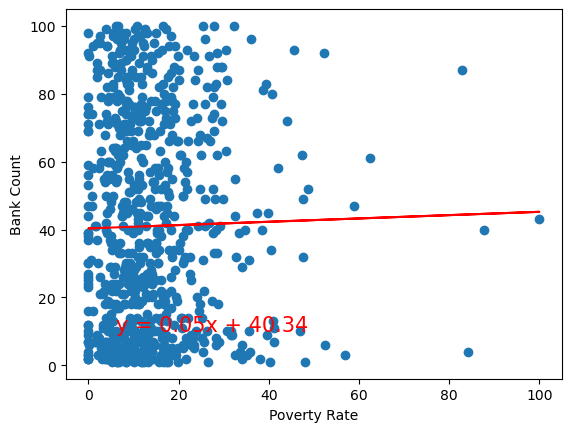

In [93]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = census_data_complete["Poverty Rate"].astype("float")
y_values = census_data_complete["Bank Count"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Poverty Rate')
plt.ylabel('Bank Count')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

## 6. Analysis.

Write a sentence describing your findings. Were they what you expected? What other factors could be at play?

* There is a very weak correlation between poverty rates and bank counts. Keep in mind that linear regression will not consider other factors such as population or size of the city.

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "06-Python-APIs - Day 3 - APIs and Geospatial Data Visualization"
objectives = [
    "Use the Google Maps and Places API to obtain information about geographic areas",
    "Use the Census API wrapper",
    "Understand the concept of rate limits and the importance of creating `test cases` prior to running large scripts",
    "How to dissect new API documentation",
    "Visually represent data on a map with Jupyter Gmaps",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))